Colab Link: https://colab.research.google.com/drive/1ld2n6_0UVRcQ97XHLLHfdQs6BnSA9r4q

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# set display options
np.set_printoptions(precision=5)

## Logistic Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

### With Two Independent Variables

#### Data Prep

##### Generate

In [3]:
# Generate input data
np.random.seed(100)

n_samples = 30

X = np.linspace(0, 10, n_samples)
print(X)

[ 0.       0.34483  0.68966  1.03448  1.37931  1.72414  2.06897  2.41379
  2.75862  3.10345  3.44828  3.7931   4.13793  4.48276  4.82759  5.17241
  5.51724  5.86207  6.2069   6.55172  6.89655  7.24138  7.58621  7.93103
  8.27586  8.62069  8.96552  9.31034  9.65517 10.     ]


In [4]:
# Define a true function for sine curve
f1 = lambda X: np.sin(1.5 * np.pi * X)
# Use the true function to generate data points corresponding to a sine curve
y_sin = f1(X)
print(y_sin)

[ 0.00000e+00  9.98533e-01 -1.08119e-01 -9.86827e-01  2.14970e-01
  9.63550e-01 -3.19302e-01 -9.28977e-01  4.19889e-01  8.83512e-01
 -5.15554e-01 -8.27689e-01  6.05174e-01  7.62162e-01 -6.87699e-01
 -6.87699e-01  7.62162e-01  6.05174e-01 -8.27689e-01 -5.15554e-01
  8.83512e-01  4.19889e-01 -9.28977e-01 -3.19302e-01  9.63550e-01
  2.14970e-01 -9.86827e-01 -1.08119e-01  9.98533e-01  5.38968e-15]


In [6]:
# Add some noise to the output data
y_sin += np.random.randn(n_samples) * 0.5
print(y_sin)

[-0.87488  1.16987  0.4684  -1.11304  0.70563  1.22066 -0.20871 -1.464
  0.32514  1.01101 -0.74457 -0.61011  0.31338  1.17059 -0.35134 -0.73991
  0.49652  1.12004 -1.04676 -1.07471  1.693    1.19069 -1.05492 -0.74052
  1.05581  0.68351 -0.62133  0.57266  0.83541  0.02784]


In [7]:
# Convert input to a feature vector
X = np.transpose([X])
print(X)

[[ 0.     ]
 [ 0.34483]
 [ 0.68966]
 [ 1.03448]
 [ 1.37931]
 [ 1.72414]
 [ 2.06897]
 [ 2.41379]
 [ 2.75862]
 [ 3.10345]
 [ 3.44828]
 [ 3.7931 ]
 [ 4.13793]
 [ 4.48276]
 [ 4.82759]
 [ 5.17241]
 [ 5.51724]
 [ 5.86207]
 [ 6.2069 ]
 [ 6.55172]
 [ 6.89655]
 [ 7.24138]
 [ 7.58621]
 [ 7.93103]
 [ 8.27586]
 [ 8.62069]
 [ 8.96552]
 [ 9.31034]
 [ 9.65517]
 [10.     ]]


##### Read

In [18]:
dataset = pd.read_csv('data/ClassificationData1.csv')
dataset.head(2)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0


In [19]:
X = dataset.iloc[:, :-1].values   # Get all Rows and All but last column - independent variables
y = dataset.iloc[:, -1].values    # Get all Rows and last column - dependent variable
# print("X Values: ", X)
print(type(X))
print(X.shape)
# print("y Values: ", y)
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(400, 2)
<class 'numpy.ndarray'>
(400,)


#### Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

#### Build Model and Predict

In [23]:
from sklearn.linear_model import LogisticRegression
c_lr = LogisticRegression(random_state = 0)
c_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [24]:
# Predict
y_pred = c_lr.predict(sc.transform(X_test))
type(y_pred), y_pred.shape

(numpy.ndarray, (80,))

#### Check Predictions

In [25]:
# Convert test and predicted arrays to vertical arrays
print("Test array shape before change: ", y_test.shape)
y_test_rshp = y_test.reshape(len(y_test),1)
print("Test array shape after change: ", y_test_rshp.shape)
print("\nPredicted array shape before change: ", y_pred.shape)
y_pred_rshp = y_pred.reshape(len(y_pred),1)
print("Predicted array shape after change: ", y_pred_rshp.shape)

Test array shape before change:  (80,)
Test array shape after change:  (80, 1)

Predicted array shape before change:  (80,)
Predicted array shape after change:  (80, 1)


In [26]:
# Print test and pred arrays side by side
comp_df = pd.DataFrame(np.concatenate((y_test_rshp,y_pred_rshp),axis=1))
comp_df.columns = ['test','pred']
comp_df

,test,pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
75,0,0
76,0,1
77,0,0
78,1,1


#### Predict output for a single value

In [27]:
print("Linear Model Predicted value is: ", c_lr.predict(sc.transform([[50, 80000]])))

Linear Model Predicted value is:  [1]


#### Confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ",cm)
print("Number of correct predictions for label 0: ",cm[0][0])
print("Number of correct predictions for label 1: ",cm[1][1])
print("Number of incorrect predictions for label 0: ",cm[0][1])
print("Number of incorrect predictions for label 1: ",cm[1][0])

Confusion Matrix:  [[57  1]
 [ 5 17]]
Number of correct predictions for label 0:  57
Number of correct predictions for label 1:  17
Number of incorrect predictions for label 0:  1
Number of incorrect predictions for label 1:  5


#### Evaluate

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.925

#### Vizualize

##### Training Set

In [15]:
# Create a mesh with the independent variables and 
# make predictions corresponding to the mesh data points
# for plotting as contour background

# Get back the training data
X_tr, y_tr = sc.inverse_transform(X_train), y_train

# Generate finer grain points corresponding to the first independent variable
X_set1 = np.arange(X_tr[:, 0].min() - 10, X_tr[:, 0].max() + 10, 0.25)
# Generate finer grain points corresponding to the second independent variable
X_set2 = np.arange(X_tr[:, 1].min() - 1000, X_tr[:, 1].max() + 1000, 0.25)

# Create meshgrid 
X1, X2 = np.meshgrid(X_set1, X_set2)
# X1.shape, X2.shape -> ((8000, 80)

# Flatten, combine and transpose
X1_rav = X1.ravel()
X2_rav = X2.ravel()
# X1_rav.shape, X1_rav.shape -> (640000,)
Z1 = np.array([X1_rav, X2_rav])
# Z1.shape -> (2, 640000)
Z1_T = Z1.T
# Z1_T.shape -> (640000, 2)

# Transform and Predict
Z_pr = c_lr.predict(sc.transform(Z1_T))

# Points to be plotted in background
Z_set = Z_pr.reshape(X1.shape)

/var/folders/ls/5lqzwfjn3s76sfqks59rdzdm0000gn/T/ipykernel_23143/2879918101.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_tr[y_tr == j, 0], X_tr[y_tr == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


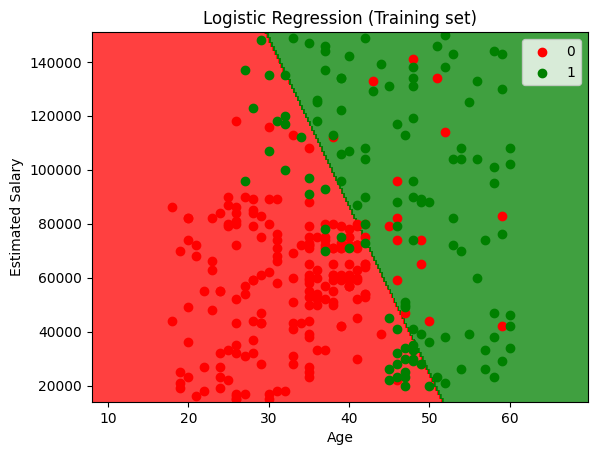

In [16]:
# Vizualize the training set
from matplotlib.colors import ListedColormap
# Plot contour with 0 and 1 labels represented by red and green colors respectively
plt.contourf(X1, X2, Z_set,
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# Set plot limits
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
# Plot y traingind data as scatter plot
for i, j in enumerate(np.unique(y_tr)):
    plt.scatter(X_tr[y_tr == j, 0], X_tr[y_tr == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

##### Test Set

/var/folders/ls/5lqzwfjn3s76sfqks59rdzdm0000gn/T/ipykernel_23143/4249561686.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


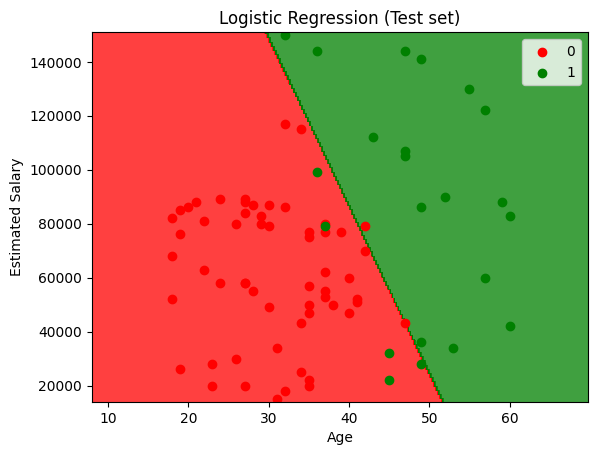

In [30]:
# Vizualize the test set
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, c_lr.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### With Multiple Independent Variables

#### Data Prep

##### Read

In [68]:
data = pd.read_csv("./data/uci_breast_cancer_wisconsin_original.csv")
data.head(2)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2


In [77]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

#### Train Test Split

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

#### Feature Scaling

In [79]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

#### Build Model and Predict

In [81]:
from sklearn.linear_model import LogisticRegression
c_lr = LogisticRegression(random_state = 0)
c_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [82]:
y_pred_lr = c_lr.predict(sc.transform(X_test))

#### Confusion Matrix

In [84]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_lr

array([[84,  3],
       [ 3, 47]])

#### Evaluate

In [86]:
from sklearn.metrics import accuracy_score
print("Accuracy with Linear Regression: ", accuracy_score(y_test, y_pred_lr))

Accuracy with Linear Regression:  0.9562043795620438


## KNN

### With Two Independent Variables

#### Data Prep

##### Read

In [50]:
dataset = pd.read_csv('data/ClassificationData1.csv')
dataset.head(2)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0


In [51]:
X = dataset.iloc[:, :-1].values   # Get all Rows and All but last column - independent variables
y = dataset.iloc[:, -1].values    # Get all Rows and last column - dependent variable
# print("X Values: ", X)
print(type(X))
print(X.shape)
# print("y Values: ", y)
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(400, 2)
<class 'numpy.ndarray'>
(400,)


#### Train Test Split

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

#### Feature Scaling

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#### Build Model and Predict

In [54]:
from sklearn.neighbors import KNeighborsClassifier
c_knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
c_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [55]:
# Predict
y_pred = c_knn.predict(X_test)

#### Check Predictions

In [56]:
# Convert test and predicted arrays to vertical arrays
print("Test array shape before change: ", y_test.shape)
y_test_rshp = y_test.reshape(len(y_test),1)
print("Test array shape after change: ", y_test_rshp.shape)
print("\nPredicted array shape before change: ", y_pred.shape)
y_pred_rshp = y_pred.reshape(len(y_pred),1)
print("Predicted array shape after change: ", y_pred_rshp.shape)

Test array shape before change:  (80,)
Test array shape after change:  (80, 1)

Predicted array shape before change:  (80,)
Predicted array shape after change:  (80, 1)


In [22]:
comp_df = pd.DataFrame(np.concatenate((y_test_rshp, y_pred_rshp),axis=1))
comp_df.columns=['test','pred']
comp_df                

,test,pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
75,0,0
76,0,0
77,0,0
78,1,1


#### Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ",cm)
print("Number of correct predictions for label 0: ",cm[0][0])
print("Number of correct predictions for label 1: ",cm[1][1])
print("Number of incorrect predictions for label 0: ",cm[0][1])
print("Number of incorrect predictions for label 1: ",cm[1][0])

Confusion Matrix:  [[54  4]
 [ 1 21]]
Number of correct predictions for label 0:  54
Number of correct predictions for label 1:  21
Number of incorrect predictions for label 0:  4
Number of incorrect predictions for label 1:  1


#### Evaluate

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9375

#### Vizualize

/var/folders/ls/5lqzwfjn3s76sfqks59rdzdm0000gn/T/ipykernel_10680/1648433403.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


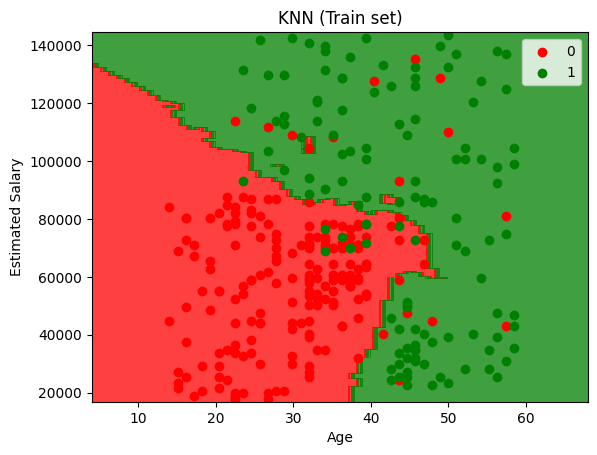

In [25]:
# Vizualize the training set
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, c_knn.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN (Train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

/var/folders/ls/5lqzwfjn3s76sfqks59rdzdm0000gn/T/ipykernel_10680/4231122907.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


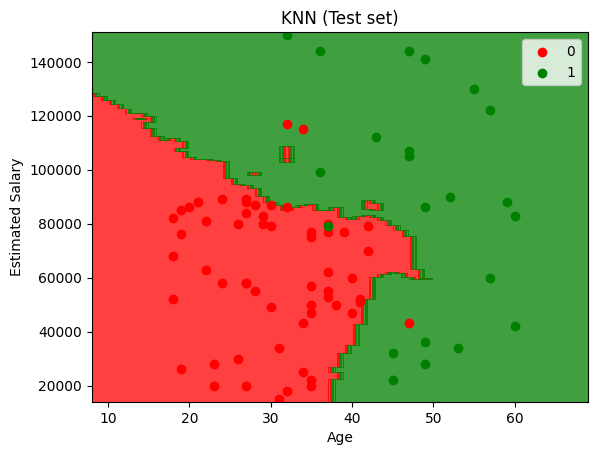

In [26]:
# Vizualize the test set
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, c_knn.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### With Multiple Independent Variables

#### Data Prep

##### Read

In [87]:
data = pd.read_csv("./data/uci_breast_cancer_wisconsin_original.csv")
data.head(2)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2


In [88]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

#### Train Test Split

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

#### Feature Scaling

In [90]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

#### Build Model and Predict

In [91]:
from sklearn.neighbors import KNeighborsClassifier
c_knn = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p=2)
c_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [93]:
y_pred_knn = c_knn.predict(sc.transform(X_test))

#### Confusion Matrix

In [94]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_knn))

[[84  3]
 [ 3 47]]


#### Evaluate

In [95]:
from sklearn.metrics import accuracy_score
print("Accuracy with Nearest Neighbors: ", accuracy_score(y_test, y_pred_knn))

Accuracy with Nearest Neighbors:  0.9562043795620438


## Support Vector Machine (SVM)

### With Two Independent Variables

#### Data Prep

##### Read

In [16]:
dataset = pd.read_csv('data/ClassificationData1.csv')
dataset.head(2)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0


In [17]:
X = dataset.iloc[:, :-1].values   # Get all Rows and All but last column - independent variables
y = dataset.iloc[:, -1].values    # Get all Rows and last column - dependent variable
# print("X Values: ", X)
print(type(X))
print(X.shape)
# print("y Values: ", y)
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(400, 2)
<class 'numpy.ndarray'>
(400,)


#### Train Test Split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

#### Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)

#### Build Model and Predict

In [20]:
from sklearn.svm import SVC
# Linear Kernel
c_svc_l = SVC(kernel = 'linear', random_state=0)
c_svc_l.fit(X_train, y_train)
# rbf kernel
c_svc_rbf = SVC(kernel = 'rbf', random_state=0)
c_svc_rbf.fit(X_train, y_train)

SVC(random_state=0)

In [21]:
# Predict
# Linear Kernel
y_pred_l = c_svc_l.predict(sc.transform(X_test))
# rbf kernel
y_pred_rbf = c_svc_rbf.predict(sc.transform(X_test))

#### Check Predictions

In [22]:
# Convert test and predicted arrays to vertical arrays
print("Test array shape before change: ", y_test.shape)
y_test_rshp = y_test.reshape(len(y_test),1)
print("Test array shape after change: ", y_test_rshp.shape)
print("\nPredicted array shapes before change: ", y_pred_l.shape, y_pred_rbf.shape)
y_pred_l_rshp = y_pred_l.reshape(len(y_pred_l),1)
y_pred_rbf_rshp = y_pred_rbf.reshape(len(y_pred_rbf),1)
print("Predicted array shapes after change: ", y_pred_l_rshp.shape, y_pred_rbf_rshp.shape)

Test array shape before change:  (80,)
Test array shape after change:  (80, 1)

Predicted array shapes before change:  (80,) (80,)
Predicted array shapes after change:  (80, 1) (80, 1)


In [23]:
comp_df = pd.DataFrame(np.concatenate((y_test_rshp, y_pred_l_rshp, y_pred_rbf_rshp),axis=1))
comp_df.columns=['test','pred_l', 'pred_rbf']
comp_df                

,test,pred_l,pred_rbf
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
75,0,0,0
76,0,1,0
77,0,0,0
78,1,1,1


#### Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix
# With Linear Kernel
cm_l = confusion_matrix(y_test, y_pred_l)
print("Confusion Matrix: ",cm_l)
print("Number of correct predictions for label 0: ",cm_l[0][0])
print("Number of correct predictions for label 1: ",cm_l[1][1])
print("Number of incorrect predictions for label 0: ",cm_l[0][1])
print("Number of incorrect predictions for label 1: ",cm_l[1][0])

Confusion Matrix:  [[57  1]
 [ 6 16]]
Number of correct predictions for label 0:  57
Number of correct predictions for label 1:  16
Number of incorrect predictions for label 0:  1
Number of incorrect predictions for label 1:  6


In [25]:
# With rbf kernel
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
print("Confusion Matrix: ",cm_rbf)
print("Number of correct predictions for label 0: ",cm_rbf[0][0])
print("Number of correct predictions for label 1: ",cm_rbf[1][1])
print("Number of incorrect predictions for label 0: ",cm_rbf[0][1])
print("Number of incorrect predictions for label 1: ",cm_rbf[1][0])

Confusion Matrix:  [[55  3]
 [ 1 21]]
Number of correct predictions for label 0:  55
Number of correct predictions for label 1:  21
Number of incorrect predictions for label 0:  3
Number of incorrect predictions for label 1:  1


#### Evaluate

In [26]:
from sklearn.metrics import accuracy_score
print("Accuracy with linear kernel: ",accuracy_score(y_test, y_pred_l))
print("Accuracy with rbf kernel: ",accuracy_score(y_test, y_pred_rbf))

Accuracy with linear kernel:  0.9125
Accuracy with rbf kernel:  0.95


#### Vizualize

/var/folders/ls/5lqzwfjn3s76sfqks59rdzdm0000gn/T/ipykernel_77306/2231761655.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


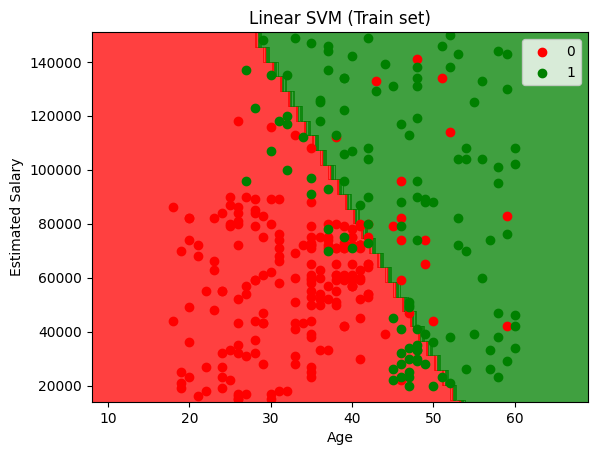

In [27]:
# Vizualize the training set with linear kernel
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, c_svc_l.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Linear SVM (Train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

/var/folders/ls/5lqzwfjn3s76sfqks59rdzdm0000gn/T/ipykernel_77306/2108247965.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


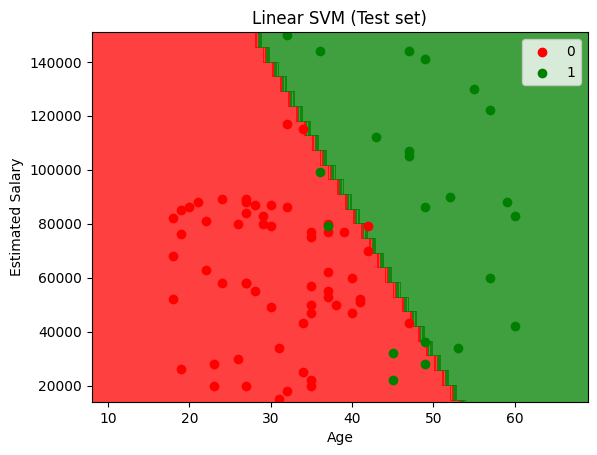

In [28]:
# Vizualize the test set with linear model
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, c_svc_l.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Linear SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

/var/folders/ls/5lqzwfjn3s76sfqks59rdzdm0000gn/T/ipykernel_77306/3769593982.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


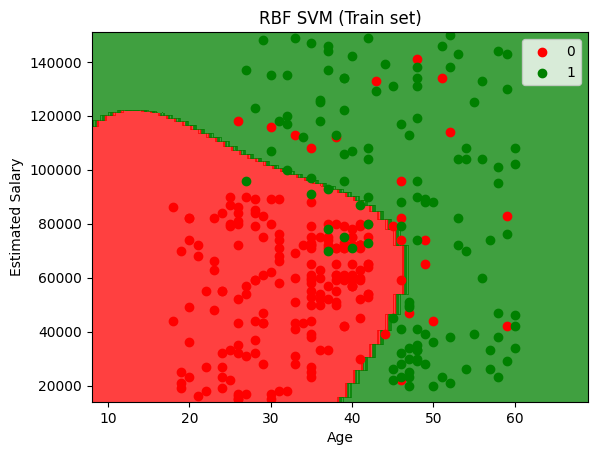

In [29]:
# Vizualize the training set with rbf kernel
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, c_svc_rbf.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('RBF SVM (Train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

/var/folders/ls/5lqzwfjn3s76sfqks59rdzdm0000gn/T/ipykernel_77306/2030131340.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


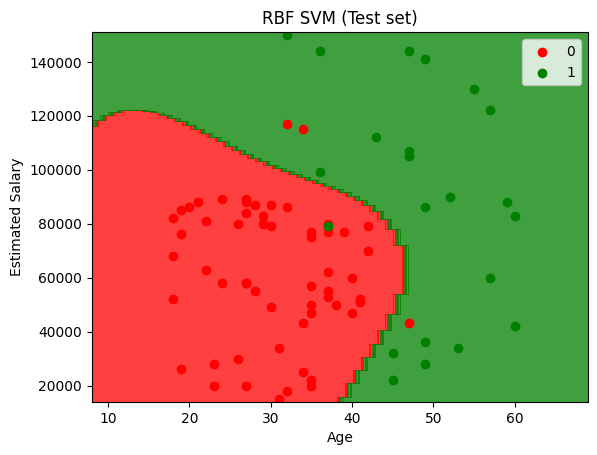

In [30]:
# Vizualize the test set with linear model
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, c_svc_rbf.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('RBF SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### With Multiple Independent Variables

#### Data Prep

##### Read

In [96]:
data = pd.read_csv("./data/uci_breast_cancer_wisconsin_original.csv")
data.head(2)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2


In [97]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

#### Train Test Split

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

#### Feature Scaling

In [99]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

#### Build Model and Predict

In [100]:
from sklearn.svm import SVC
c_svc = SVC(kernel = 'rbf', random_state = 0)
c_svc.fit(X_train, y_train)

SVC(random_state=0)

In [101]:
y_pred_svc = c_svc.predict(sc.transform(X_test))

#### Confusion Matrix

In [102]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_svc))

[[82  5]
 [ 1 49]]


#### Evaluate

In [103]:
from sklearn.metrics import accuracy_score
print("Accuracy with Support Vector: ", accuracy_score(y_test, y_pred_svc))

Accuracy with Support Vector:  0.9562043795620438


## Naive Bayes

### With Two Independent Variables

#### Data Prep

##### Read

In [3]:
dataset = pd.read_csv('data/ClassificationData1.csv')
dataset.head(2)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0


In [4]:
X = dataset.iloc[:, :-1].values   # Get all Rows and All but last column - independent variables
y = dataset.iloc[:, -1].values    # Get all Rows and last column - dependent variable
# print("X Values: ", X)
print(type(X))
print(X.shape)
# print("y Values: ", y)
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(400, 2)
<class 'numpy.ndarray'>
(400,)


#### Train Test Split

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

#### Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

#### Build Model and Predict

In [81]:
from sklearn.naive_bayes import GaussianNB
c_gnb = GaussianNB()
c_gnb.fit(X_train, y_train)

GaussianNB()

In [8]:
# Predict
y_pred_gnb = c_gnb.predict(sc.transform(X_test))

#### Check Predictions

In [10]:
# Convert test and predicted arrays to vertical arrays
print("Test array shape before change: ", y_test.shape)
y_test_gnb_rshp = y_test.reshape(len(y_test),1)
print("Test array shape after change: ", y_test_gnb_rshp.shape)
print("\nPredicted array shapes before change: ", y_pred_gnb.shape)
y_pred_gnb_rshp = y_pred_gnb.reshape(len(y_pred_gnb),1)
print("Predicted array shapes after change: ", y_pred_gnb_rshp.shape)

Test array shape before change:  (80,)
Test array shape after change:  (80, 1)

Predicted array shapes before change:  (80,)
Predicted array shapes after change:  (80, 1)


In [11]:
comp_df = pd.DataFrame(np.concatenate((y_test_gnb_rshp, y_pred_gnb_rshp),axis=1))
comp_df.columns=['test','pred_']
comp_df                

,test,pred_
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
75,0,0
76,0,0
77,0,0
78,1,1


#### Confusion Matrix

In [12]:
from sklearn.metrics import confusion_matrix
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
print("Confusion Matrix: ",cm_gnb)
print("Number of correct predictions for label 0: ",cm_gnb[0][0])
print("Number of correct predictions for label 1: ",cm_gnb[1][1])
print("Number of incorrect predictions for label 0: ",cm_gnb[0][1])
print("Number of incorrect predictions for label 1: ",cm_gnb[1][0])

Confusion Matrix:  [[55  3]
 [ 4 18]]
Number of correct predictions for label 0:  55
Number of correct predictions for label 1:  18
Number of incorrect predictions for label 0:  3
Number of incorrect predictions for label 1:  4


#### Evaluate

In [13]:
from sklearn.metrics import accuracy_score
print("Accuracy: ",accuracy_score(y_test, y_pred_gnb))

Accuracy:  0.9125


#### Vizualize

/var/folders/ls/5lqzwfjn3s76sfqks59rdzdm0000gn/T/ipykernel_77306/1542967505.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


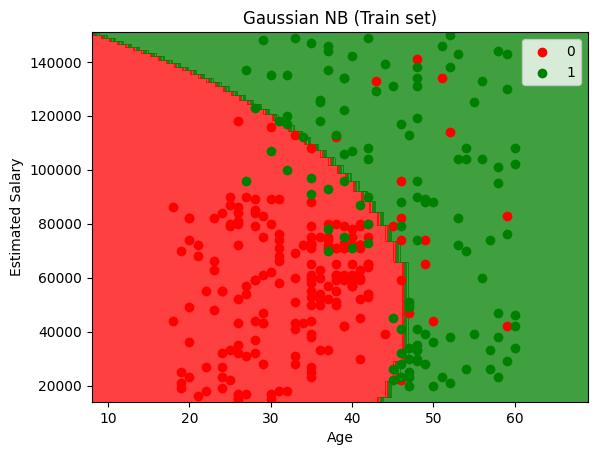

In [14]:
# Vizualize the training set with linear kernel
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, c_gnb.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Gaussian NB (Train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

/var/folders/ls/5lqzwfjn3s76sfqks59rdzdm0000gn/T/ipykernel_77306/680255892.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


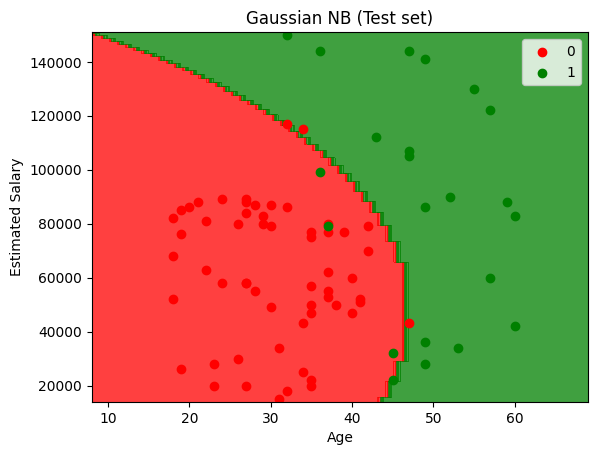

In [15]:
# Vizualize the test set with linear model
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, c_gnb.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Gaussian NB (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### With Multiple Independent Variables

#### Data Prep

##### Read

In [104]:
data = pd.read_csv("./data/uci_breast_cancer_wisconsin_original.csv")
data.head(2)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2


In [105]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

#### Train Test Split

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

#### Feature Scaling

In [107]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

#### Build Model and Predict

In [110]:
from sklearn.naive_bayes import GaussianNB
c_nb = GaussianNB()
c_nb.fit(X_train, y_train)

GaussianNB()

In [111]:
y_pred_nb = c_nb.predict(sc.transform(X_test))

#### Confusion Matrix

In [112]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_nb))

[[80  7]
 [ 0 50]]


#### Evaluate

In [131]:
from sklearn.metrics import accuracy_score
print("Accuracy with Naive Bayes: ", accuracy_score(y_test, y_pred_nb))

Accuracy with Naive Bayes:  0.948905109489051


## Decision Tree

### With Two Independent Variables

#### Data Prep

##### Read

In [31]:
dataset = pd.read_csv('data/ClassificationData1.csv')
dataset.head(2)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0


In [32]:
X = dataset.iloc[:, :-1].values   # Get all Rows and All but last column - independent variables
y = dataset.iloc[:, -1].values    # Get all Rows and last column - dependent variable
# print("X Values: ", X)
print(type(X))
print(X.shape)
# print("y Values: ", y)
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(400, 2)
<class 'numpy.ndarray'>
(400,)


#### Train Test Split

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

#### Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

#### Build Model and Predict

In [35]:
from sklearn.tree import DecisionTreeClassifier
c_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
c_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [36]:
# Predict
y_pred_dt = c_dt.predict(sc.transform(X_test))

#### Check Predictions

In [37]:
# Convert test and predicted arrays to vertical arrays
print("Test array shape before change: ", y_test.shape)
y_test_dt_rshp = y_test.reshape(len(y_test),1)
print("Test array shape after change: ", y_test_dt_rshp.shape)
print("\nPredicted array shapes before change: ", y_pred_dt.shape)
y_pred_dt_rshp = y_pred_dt.reshape(len(y_pred_dt),1)
print("Predicted array shapes after change: ", y_pred_dt_rshp.shape)

Test array shape before change:  (80,)
Test array shape after change:  (80, 1)

Predicted array shapes before change:  (80,)
Predicted array shapes after change:  (80, 1)


In [38]:
comp_df = pd.DataFrame(np.concatenate((y_test_dt_rshp, y_pred_dt_rshp),axis=1))
comp_df.columns=['test','pred_']
comp_df                

,test,pred_
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
75,0,0
76,0,0
77,0,0
78,1,1


#### Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix: ",cm_dt)
print("Number of correct predictions for label 0: ",cm_dt[0][0])
print("Number of correct predictions for label 1: ",cm_dt[1][1])
print("Number of incorrect predictions for label 0: ",cm_dt[0][1])
print("Number of incorrect predictions for label 1: ",cm_dt[1][0])

Confusion Matrix:  [[53  5]
 [ 3 19]]
Number of correct predictions for label 0:  53
Number of correct predictions for label 1:  19
Number of incorrect predictions for label 0:  5
Number of incorrect predictions for label 1:  3


#### Evaluate

In [42]:
from sklearn.metrics import accuracy_score
print("Accuracy: ",accuracy_score(y_test, y_pred_dt))

Accuracy:  0.9


#### Vizualize

/var/folders/ls/5lqzwfjn3s76sfqks59rdzdm0000gn/T/ipykernel_77306/3530478888.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


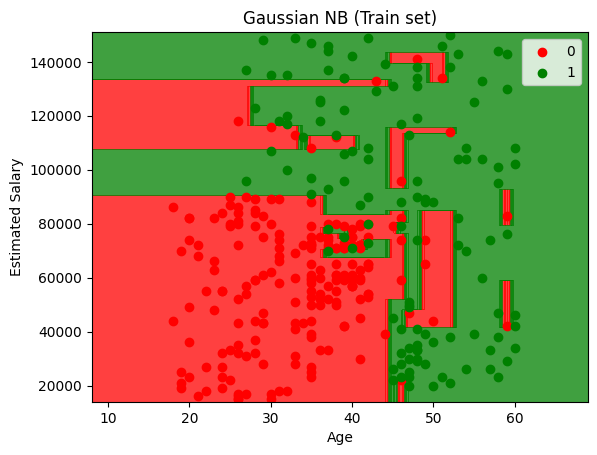

In [43]:
# Vizualize the training set with linear kernel
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, c_dt.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Gaussian NB (Train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

/var/folders/ls/5lqzwfjn3s76sfqks59rdzdm0000gn/T/ipykernel_77306/1790110951.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


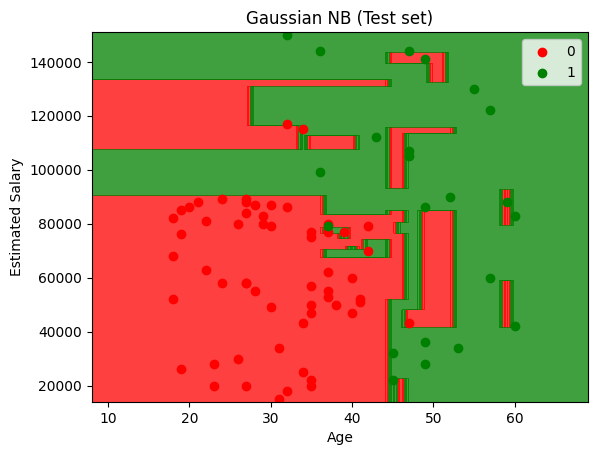

In [44]:
# Vizualize the test set with linear model
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, c_dt.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Gaussian NB (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### With Multiple Independent Variables

#### Data Prep

##### Read

In [114]:
data = pd.read_csv("./data/uci_breast_cancer_wisconsin_original.csv")
data.head(2)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2


In [115]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

#### Train Test Split

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

#### Feature Scaling

In [117]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

#### Build Model and Predict

In [118]:
from sklearn.tree import DecisionTreeClassifier
c_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
c_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [119]:
y_pred_dt = c_dt.predict(sc.transform(X_test))

#### Confusion Matrix

In [120]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_dt))

[[84  3]
 [ 3 47]]


#### Evaluate

In [130]:
from sklearn.metrics import accuracy_score
print("Accuracy with Decision Tree: ", accuracy_score(y_test, y_pred_dt))

Accuracy with Decision Tree:  0.9562043795620438


## Random Forest

### With Two Independent Variables

#### Data Prep

##### Read

In [50]:
dataset = pd.read_csv('data/ClassificationData1.csv')
dataset.head(2)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0


In [51]:
X = dataset.iloc[:, :-1].values   # Get all Rows and All but last column - independent variables
y = dataset.iloc[:, -1].values    # Get all Rows and last column - dependent variable
# print("X Values: ", X)
print(type(X))
print(X.shape)
# print("y Values: ", y)
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(400, 2)
<class 'numpy.ndarray'>
(400,)


#### Train Test Split

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

#### Feature Scaling

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

#### Build Model and Predict

In [62]:
from sklearn.ensemble import RandomForestClassifier
c_rf_10 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
c_rf_10.fit(X_train, y_train)
c_rf_15 = RandomForestClassifier(n_estimators = 15, criterion = 'entropy', random_state = 0)
c_rf_15.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=0)

In [63]:
# Predict
y_pred_rf_10 = c_rf_10.predict(sc.transform(X_test))
y_pred_rf_15 = c_rf_15.predict(sc.transform(X_test))

#### Check Predictions

In [64]:
# Convert test and predicted arrays to vertical arrays
print("Test array shape before change: ", y_test.shape)
y_test_rf_rshp = y_test.reshape(len(y_test),1)
print("Test array shape after change: ", y_test_rf_rshp.shape)
print("\nPredicted array shapes before change: ", y_pred_rf_10.shape)
y_pred_rf_10_rshp = y_pred_rf_10.reshape(len(y_pred_rf),1)
print("Predicted array shapes after change: ", y_pred_rf_10_rshp.shape)

Test array shape before change:  (80,)
Test array shape after change:  (80, 1)

Predicted array shapes before change:  (80,)
Predicted array shapes after change:  (80, 1)


In [65]:
comp_df = pd.DataFrame(np.concatenate((y_test_rf_rshp, y_pred_rf_10_rshp),axis=1))
comp_df.columns=['test','pred_']
comp_df                

,test,pred_
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
75,0,0
76,0,0
77,0,0
78,1,1


#### Confusion Matrix

In [66]:
from sklearn.metrics import confusion_matrix
cm_rf_10 = confusion_matrix(y_test, y_pred_rf_10)
print("Confusion Matrix with 10 estimators: ",cm_rf_10)
print("Number of correct predictions for label 0: ",cm_rf_10[0][0])
print("Number of correct predictions for label 1: ",cm_rf_10[1][1])
print("Number of incorrect predictions for label 0: ",cm_rf_10[0][1])
print("Number of incorrect predictions for label 1: ",cm_rf_10[1][0])
cm_rf_15 = confusion_matrix(y_test, y_pred_rf_15)
print("Confusion Matrix with 15 estimators: ",cm_rf_15)

Confusion Matrix with 10 estimators:  [[54  4]
 [ 3 19]]
Number of correct predictions for label 0:  54
Number of correct predictions for label 1:  19
Number of incorrect predictions for label 0:  4
Number of incorrect predictions for label 1:  3
Confusion Matrix with 15 estimators:  [[54  4]
 [ 3 19]]


#### Evaluate

In [67]:
from sklearn.metrics import accuracy_score
print("Accuracy with 10 estimators: ",accuracy_score(y_test, y_pred_rf_10))
print("Accuracy with 15 estimators: ",accuracy_score(y_test, y_pred_rf_15))

Accuracy with 10 estimators:  0.9125
Accuracy with 15 estimators:  0.9125


#### Vizualize

/var/folders/ls/5lqzwfjn3s76sfqks59rdzdm0000gn/T/ipykernel_77306/1781230476.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


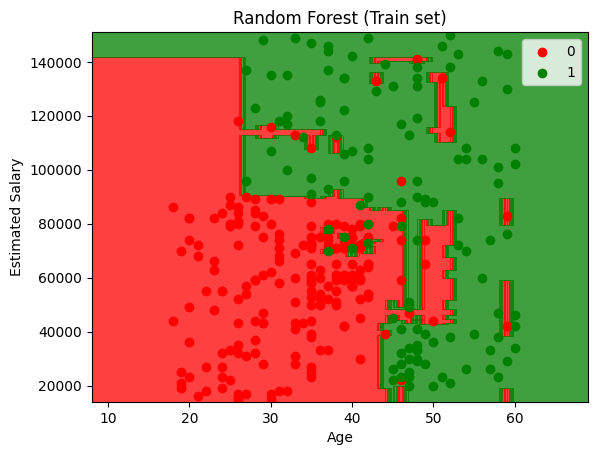

In [60]:
# Vizualize the training set with linear kernel
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, c_rf_10.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

/var/folders/ls/5lqzwfjn3s76sfqks59rdzdm0000gn/T/ipykernel_77306/3539281767.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


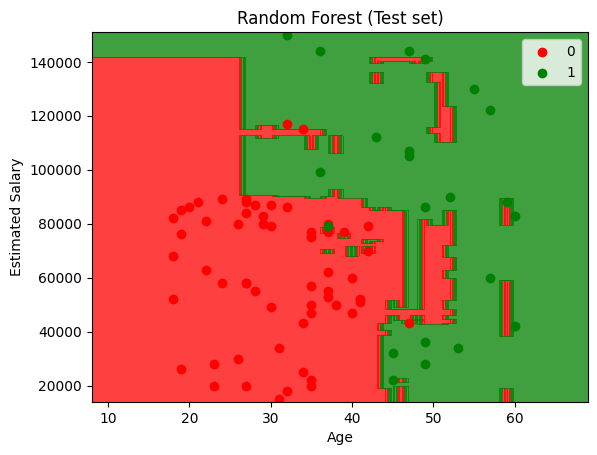

In [61]:
# Vizualize the test set with linear model
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, c_rf_10.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### With Multiple Independent Variables

#### Data Prep

##### Read

In [122]:
data = pd.read_csv("./data/uci_breast_cancer_wisconsin_original.csv")
data.head(2)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2


In [123]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

#### Train Test Split

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

#### Feature Scaling

In [125]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

#### Build Model and Predict

In [126]:
from sklearn.ensemble import RandomForestClassifier
c_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
c_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [127]:
y_pred_rf = c_rf.predict(sc.transform(X_test))

#### Confusion Matrix

In [128]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_rf))

[[83  4]
 [ 3 47]]


#### Evaluate

In [129]:
from sklearn.metrics import accuracy_score
print("Accuracy with Random Forest: ", accuracy_score(y_test, y_pred_rf))

Accuracy with Random Forest:  0.948905109489051


## XGBoost
https://xgboost.readthedocs.io/en/stable/get_started.html

### Data Prep

#### Read

In [19]:
data = pd.read_csv("./data/uci_breast_cancer_wisconsin_original.csv")
data.head(2)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2


In [20]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

### Label Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

### Train Test Split

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

### Build Model and Predict

In [24]:
from xgboost import XGBClassifier
c_xgb = XGBClassifier()
c_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [25]:
y_pred_xgb = c_xgb.predict(X_test)

### Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_xgb

array([[85,  2],
       [ 2, 48]])

### Evaluate

In [29]:
from sklearn.metrics import accuracy_score
print("Accuracy with XGB Classifier: ", accuracy_score(y_test, y_pred_xgb))

Accuracy with XGB Classifier:  0.9708029197080292


### Apply K-Fold Cross Validation

In [27]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = c_xgb, X = X_train, y = y_train, cv = 10)   # 10 training splits
accuracies

array([0.92727273, 0.96363636, 0.96363636, 0.98181818, 0.94545455,
       0.98181818, 0.96296296, 0.96296296, 1.        , 0.98148148])

In [28]:
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.71 %
Standard Deviation: 1.96 %


## CatBoost
https://catboost.ai/en/docs/

### Data Prep

#### Read

In [2]:
data = pd.read_csv("./data/uci_breast_cancer_wisconsin_original.csv")
data.head(2)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2


In [3]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

### Train Test Split

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Build Model and Predict

In [8]:
from catboost import CatBoostClassifier
c_cb = CatBoostClassifier()
c_cb.fit(X_train, y_train)

Learning rate set to 0.007956
0:	learn: 0.6773044	total: 1.11ms	remaining: 1.11s
1:	learn: 0.6597970	total: 4.71ms	remaining: 2.35s
2:	learn: 0.6444872	total: 6.58ms	remaining: 2.19s
3:	learn: 0.6292693	total: 8.34ms	remaining: 2.08s
4:	learn: 0.6167804	total: 10.1ms	remaining: 2s
5:	learn: 0.6006776	total: 11.8ms	remaining: 1.96s
6:	learn: 0.5863011	total: 13.5ms	remaining: 1.92s
7:	learn: 0.5719487	total: 15.3ms	remaining: 1.9s
8:	learn: 0.5584160	total: 16.9ms	remaining: 1.86s
9:	learn: 0.5444026	total: 18.9ms	remaining: 1.87s
10:	learn: 0.5324566	total: 35.9ms	remaining: 3.23s
11:	learn: 0.5230008	total: 37.4ms	remaining: 3.08s
12:	learn: 0.5107659	total: 38.8ms	remaining: 2.95s
13:	learn: 0.4993509	total: 40.8ms	remaining: 2.88s
14:	learn: 0.4890183	total: 42.8ms	remaining: 2.81s
15:	learn: 0.4798578	total: 47.2ms	remaining: 2.9s
16:	learn: 0.4688945	total: 48.9ms	remaining: 2.83s
17:	learn: 0.4603259	total: 51.3ms	remaining: 2.8s
18:	learn: 0.4500329	total: 67ms	remaining: 3.46s


In [9]:
y_pred_cb = c_cb.predict(X_test)

### Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix
cm_cb = confusion_matrix(y_test, y_pred_cb)
cm_cb

array([[84,  3],
       [ 0, 50]])

### Evaluate

In [11]:
from sklearn.metrics import accuracy_score
print("Accuracy with Catboost Classifier: ", accuracy_score(y_test, y_pred_cb))

Accuracy with Catboost Classifier:  0.9781021897810219


### Apply K-Fold Cross Validation

In [13]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = c_cb, X = X_train, y = y_train, cv = 10)

Streaming output truncated to the last 5000 lines.
4:	learn: 0.6213919	total: 11.5ms	remaining: 2.29s
5:	learn: 0.6085308	total: 13.6ms	remaining: 2.26s
6:	learn: 0.5936406	total: 16.6ms	remaining: 2.36s
7:	learn: 0.5801586	total: 17.9ms	remaining: 2.21s
8:	learn: 0.5684233	total: 20ms	remaining: 2.2s
9:	learn: 0.5548011	total: 22.1ms	remaining: 2.19s
10:	learn: 0.5436993	total: 24.4ms	remaining: 2.19s
11:	learn: 0.5347009	total: 26.2ms	remaining: 2.15s
12:	learn: 0.5230928	total: 28ms	remaining: 2.13s
13:	learn: 0.5124371	total: 30ms	remaining: 2.11s
14:	learn: 0.5027944	total: 31.8ms	remaining: 2.09s
15:	learn: 0.4935761	total: 33.4ms	remaining: 2.05s
16:	learn: 0.4843168	total: 34.8ms	remaining: 2.01s
17:	learn: 0.4761114	total: 36.5ms	remaining: 1.99s
18:	learn: 0.4662148	total: 38.2ms	remaining: 1.97s
19:	learn: 0.4568421	total: 40.1ms	remaining: 1.96s
20:	learn: 0.4476597	total: 41.9ms	remaining: 1.95s
21:	learn: 0.4390634	total: 43.7ms	remaining: 1.94s
22:	learn: 0.4297886	total

In [14]:
accuracies

array([0.90909091, 0.94545455, 0.96363636, 0.98181818, 0.96363636,
       1.        , 0.96296296, 0.96296296, 1.        , 0.96296296])

In [15]:
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.53 %
Standard Deviation: 2.50 %
